In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

In [ ]:
# data_1 = pd.read_csv("data/Dataset1.csv")
# data_2 = pd.read_csv("data/Dataset2.csv")
# plt.scatter(data_1["X"], data_1["Y"])
# plt.savefig("Dataset2.png")
# plt.clf()
# plt.scatter(data_2["X"], data_2["Y"])
# plt.savefig("Dataset2.png")

In [114]:
data_1 = pd.read_csv("data/Dataset2.csv").values.tolist()
data_2 = pd.read_csv("data/Dataset2.csv").values.tolist()

In [ ]:
k = 3



In [115]:
avg_errors = dict()
for k in range(1, 16):
    max_loops = 15
    k_means = []
    cluster_pointers = {}
    clusters = []
    data_count = len(data_1)
    for i in range(k):
        r = np.random.randint(0, data_count)
        mean = data_1[r]
        k_means.append(mean)
        cluster_pointers.update({r : i})
        clusters.append([mean])

    for _ in range(max_loops):
        for j in range(data_count):
            point = data_1[j]
            min_dist = float("inf")
            nearest_mean_index = -1
            for i in range(k):
                dist = euclidean(k_means[i], point)
                if min_dist > dist:
                    min_dist = dist
                    nearest_mean_index = i
            try:
                clusters[cluster_pointers[j]].remove(point)
            except:
                pass
            cluster_pointers[j] = nearest_mean_index
            clusters[nearest_mean_index].append(point)
            new_mean = np.mean(clusters[nearest_mean_index])
            k_means[nearest_mean_index] = new_mean

    cluster_distances = [0 for _ in range(k)]
    for i in range(k):
        for point in clusters[i]:
            cluster_distances[i] += euclidean(k_means[i], point)
        cluster_distances[i] /= len(clusters[i])

    avg = sum(cluster_distances) / k
    avg_errors.update({k: avg})

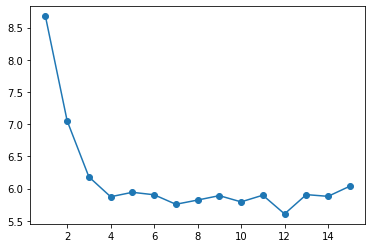

In [116]:
plt.plot(avg_errors.keys(), avg_errors.values(), '-o')
plt.savefig("avg_errors.png")

In [117]:
cluster_count = len(clusters)
xs = [[clusters[j][i][0] for i in range(len(clusters[j]))] for j in range(cluster_count)]
ys = [[clusters[j][i][1] for i in range(len(clusters[j]))] for j in range(cluster_count)]

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
colors = ["r", "g", "b", "c", "m" , "y", "lime, go"]
for i in range(cluster_count):
    ax1.scatter(xs[i], ys[i], s=10, c=colors[i])
    # ax1.scatter(xs[1], ys[1], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
# plt.show()
plt.savefig(str(k) + "-means_15-rounds.png")
